Sentiment Analysis of User Reviews (PlayStore)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df = pd.read_csv("/content/apps.csv")
df = pd.read_csv("/content/user_reviews.csv")

In [6]:
print(df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [8]:
df.info()
df['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5163


In [9]:
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = str(text).lower()

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = word_tokenize(text)

    words = [word for word in words if word not in stop_words]

    return " ".join(words)

In [18]:
df['clean_text'] = df['Translated_Review'].apply(clean_text)

df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_text
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delicious food thats im cooking food ...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eating healthy exercise regular basis
2,10 Best Foods for You,NaN,NaN,NaN,NaN,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,works great especially going grocery store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea us


In [24]:
# Filter out rows where 'Sentiment' is NaN before vectorizing and splitting
df_filtered = df.dropna(subset=['Sentiment']).copy()

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df_filtered['clean_text'])

y = df_filtered['Sentiment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7426205422732737


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.43      0.57      1662
     Neutral       0.86      0.11      0.19      1000
    Positive       0.72      0.98      0.83      4825

    accuracy                           0.74      7487
   macro avg       0.82      0.51      0.53      7487
weighted avg       0.78      0.74      0.69      7487



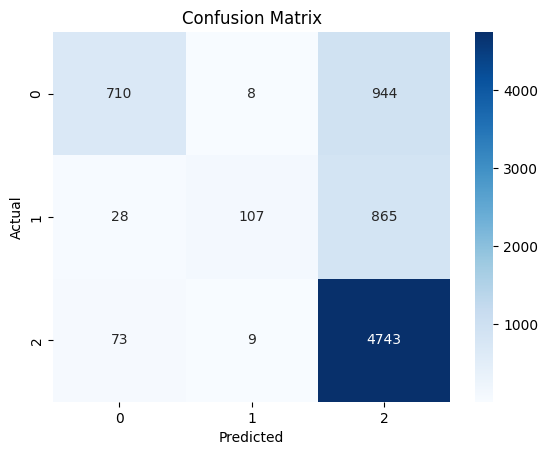

In [30]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [31]:
text = ["This product is amazing and works perfectly"]

clean = [clean_text(t) for t in text]

vector = vectorizer.transform(clean)

prediction = model.predict(vector)

print("Sentiment:", prediction[0])

Sentiment: Positive
